<a href="https://colab.research.google.com/github/datawilly/Analisis_de_series_de_tiempo/blob/main/Analisis_de_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de análisis de series de tiempo en precios de acciones

##Generando el Dataframe

Como en la mayoria de nuestros proyectos de DC vamos a usar las librerias mas importantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una vez cargadas nuestras librerias tenemos que cargar nuestros datos vamos a crear una variable que nos guarde el directorio de la carpeta donde guardamos nuestros archivos, tambien usando el método pd.DataFrame() creamos nuestro DF vacio y por ultimo creamos una lista con los nombres de los archivos que se encuentran en el directorio

In [2]:
path = '/content/drive/MyDrive/Datasets/2023 Analisis de series de tiempo/2023'
stock_data = pd.DataFrame()
company_list = ['BAC.csv','C.csv','ITUB.csv','JPM.csv','MS.csv','NU.csv','USB.csv']

Como tenemos varios archivos .csv y vamos a manejar un solo DF tenemos que unirlos todos en uno solo, eso lo hacemos a través de una iteracion en todos los archivos, usamos pd.read_csv para acceder a los datos de nuestros archivos y para encontrarlos vamos a indicarle la variable path y cada uno de los elementos de company_list.

Una vez tenemos la informacion de cada empresa vamos a agregarla a nuestro DF, pero necesitamos generar un nombre para poder identificarla, entonces tomamos los primeros caracteres de cada empresa y lo guardamos en una variable que transformamsos en uns columna dentro del DF para al fin usar pd.concat() para agregar esta informacion a nuestro DF stock_data


In [3]:
for file in company_list:
  temp_df = pd.read_csv(path+'/'+file)
  temp_df['company'] = file[0:1]
  stock_data = pd.concat([stock_data,temp_df])

In [4]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,1973-02-21,4.625000,4.625000,4.625000,4.625000,1.607725,99200,B
1,1973-02-22,4.640625,4.640625,4.640625,4.640625,1.613155,47200,B
2,1973-02-23,4.625000,4.625000,4.625000,4.625000,1.607725,133600,B
3,1973-02-26,4.625000,4.625000,4.625000,4.625000,1.607725,24000,B
4,1973-02-27,4.625000,4.625000,4.625000,4.625000,1.607725,41600,B
...,...,...,...,...,...,...,...,...
12646,2023-06-26,31.870001,32.520000,31.870001,32.320000,31.839998,11249000,U
12647,2023-06-27,32.290001,32.689999,31.840000,32.549999,32.066582,9776300,U
12648,2023-06-28,32.570000,32.570000,31.950001,32.320000,31.839998,11215400,U
12649,2023-06-29,32.180000,32.759998,32.029999,32.759998,32.759998,12479700,U


Antes de continuar es necesario verificar que tipos de datos tenemos en nuestro DF porque probablemente necesitemos realizar transformaciones para poder manejar los datos

In [5]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
company       object
dtype: object

Este proyecto trata sobe analisis de series de tiempo por lo cual poder manipular los datos en funcion del tiempo es muy importante por esto tenemos que transformar nuestra columna Date en un formato de fecha

In [6]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [7]:
stock_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
company              object
dtype: object

In [8]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
company      0
dtype: int64

##Graficando nuestros datos

Cuando trabajamos con DF lo mas seguro es que no veamos directamente las tablas ya que contienen muchos datos, una aproximacion mas visual para entender inicialmente los datos es a través de los gráficos

In [9]:
lista = []
for company in company_list:
  lista.append(company[0])
print(lista)

['B', 'C', 'I', 'J', 'M', 'N', 'U']


Ahora que tenemos nuestra lista con los nombres de las empresas podemos hacer un gráfico que nos muestre como se ven los datos de cada una

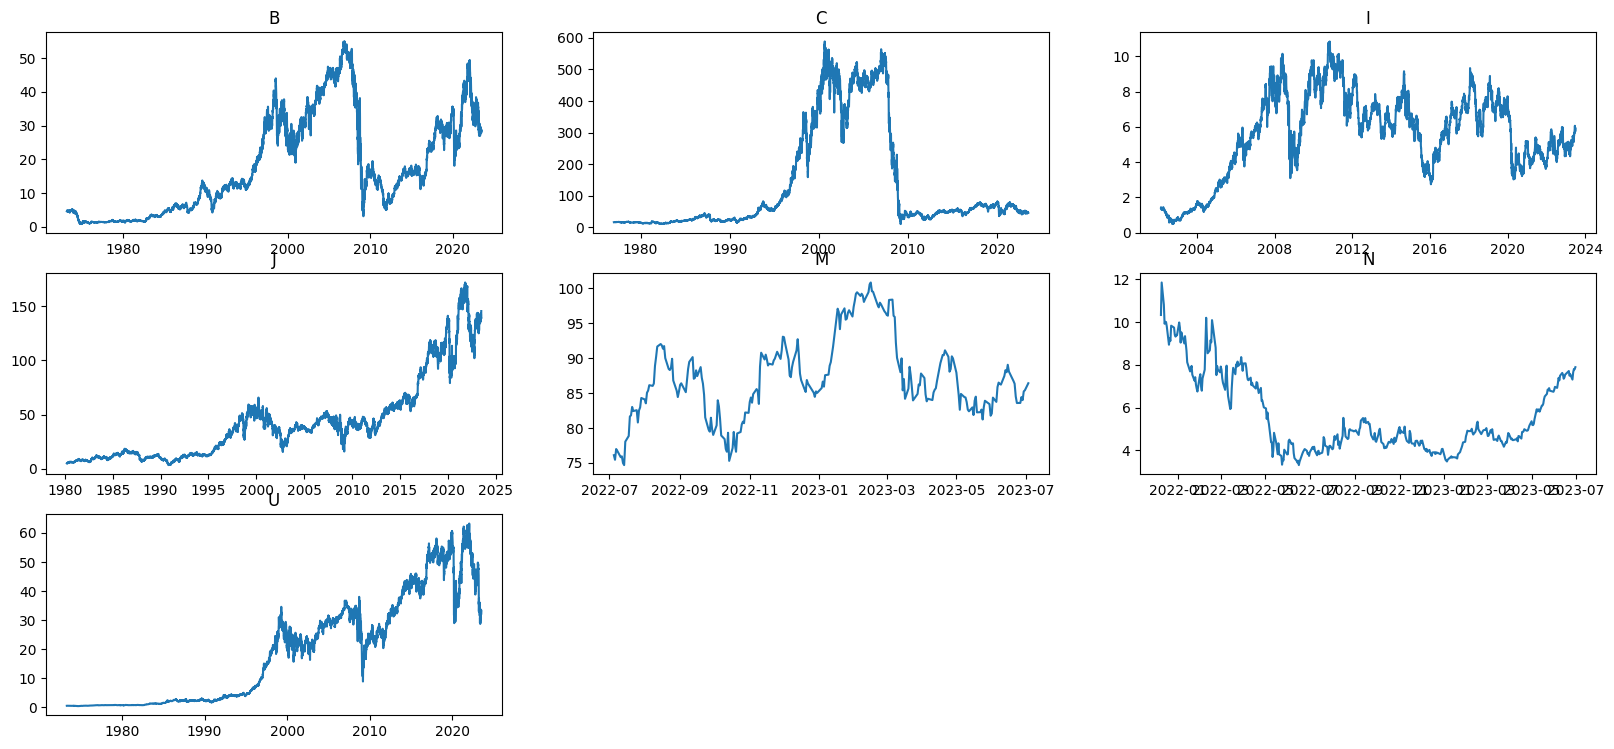

In [10]:
plt.figure(figsize=(20,12))
for i,company in enumerate(lista,1):
  plt.subplot(4,3,i)
  df = stock_data[stock_data['company']==company]
  plt.plot(df['Date'],df['Close'])
  plt.title(company)


Este tipo de graficos es bueno para presentaciones en PDF pero tambien podemos incluir graficos dinamicos usando Bokeh

In [11]:
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter

In [12]:
output_notebook()

In [16]:

plots=[]
for company in lista:
  df = stock_data[stock_data['company']==company]
  b = figure(title=company, x_axis_label='Fecha', y_axis_label='Precio')
  formatter = DatetimeTickFormatter(days='%d/%m/%Y')
  b.xaxis.formatter = formatter
  b.line(df['Date'],df['Close'])
  plots.append(b)

plots = [plots[i:i+2] for i in range(0, len(plots),2)]
grid = gridplot(plots)
show(grid)

